<a href="https://colab.research.google.com/github/vincimech010233/QuantumComputingJourney-/blob/main/ModeloClasificacionCuantica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit

In [ ]:
!pip install qiskit-aer

<ipython-input-14-332524b90a9a>:23: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


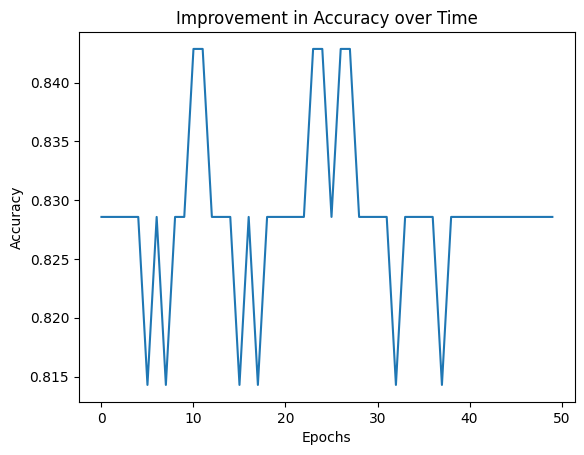

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.circuit import Parameter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Función para crear el circuito cuántico
def create_quantum_circuit(parameters):
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.rx(parameters[0], 0)
    qc.ry(parameters[1], 0)
    qc.cx(0, 1)
    qc.measure_all()
    return qc

# Función para obtener las probabilidades del estado '0' del qubit
def get_probabilities(qc, backend, param_values):
    t_qc = transpile(qc, backend)
    qobj = assemble(t_qc, shots=1024, parameter_binds=[param_values])
    result = backend.run(qobj).result()
    counts = result.get_counts()
    return counts.get('00', 0) / 1024

# Creando y preparando los datos
X, y = make_moons(n_samples=100, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializando parámetros y backend cuántico
parameters = [Parameter('θ1'), Parameter('θ2')]
backend = Aer.get_backend('qasm_simulator')
accuracies = []

# Bucle de entrenamiento simplificado
for epoch in range(50):
    predictions = []
    for x, label in zip(X_train, y_train):
        # Actualizando los valores de los parámetros para cada muestra
        param_values = {parameters[0]: x[0], parameters[1]: x[1]}
        qc = create_quantum_circuit(parameters)
        prob = get_probabilities(qc, backend, param_values)
        prediction = 1 if prob > 0.5 else 0
        predictions.append(prediction)
    accuracy = sum(np.array(predictions) == y_train) / len(y_train)
    accuracies.append(accuracy)

# Visualizando la mejora en la precisión
plt.plot(accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Improvement in Accuracy over Time')
plt.show()


In [15]:
# Inicializando la lista de predicciones de prueba
test_predictions = []

# Bucle a través de las muestras de prueba
for x in X_test:
    # Actualizando los valores de los parámetros para cada muestra de prueba
    param_values = {parameters[0]: x[0], parameters[1]: x[1]}
    qc = create_quantum_circuit(parameters)
    prob = get_probabilities(qc, backend, param_values)
    prediction = 1 if prob > 0.5 else 0
    test_predictions.append(prediction)

# Calculando la precisión de la prueba
test_accuracy = sum(np.array(test_predictions) == y_test) / len(y_test)
print(f'Test Accuracy: {test_accuracy * 100}%')

<ipython-input-14-332524b90a9a>:23: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


Test Accuracy: 76.66666666666667%


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Test Accuracy: {accuracy * 100}%')


Logistic Regression Test Accuracy: 86.66666666666667%
